#1. PERKENALAN

In [ ]:
'''
Nama  : Rugaya Muksin BSA
Batch : 006
Phase : 1
LC    : 3

'''

Problem Statement:

Membuat model machine learning unsupervised menggunakan KMeans untuk mendeteksi keadaan yang ada pada suatu negara.

#2. IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from sklearn.metrics import silhouette_samples, silhouette_score

#3. DATA LOADING

In [2]:
ori_df = pd.read_csv('Life_expectancy_dataset.csv', encoding='latin-1')
df = ori_df.copy()
df.head(1)

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe


In [3]:
df.shape

(223, 6)

Terlihat bahwa kita memiliki 223 data dengan jumlah fitur adalah 6

#4. DATA CLEANING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


*   Data yang dimiliki bersih dari missing value
*   Terdapat 4 fitur numerik dan 2 fitur non numerik. 2 fitur tersebut akan di encoding saat masuk ke preprocessing data



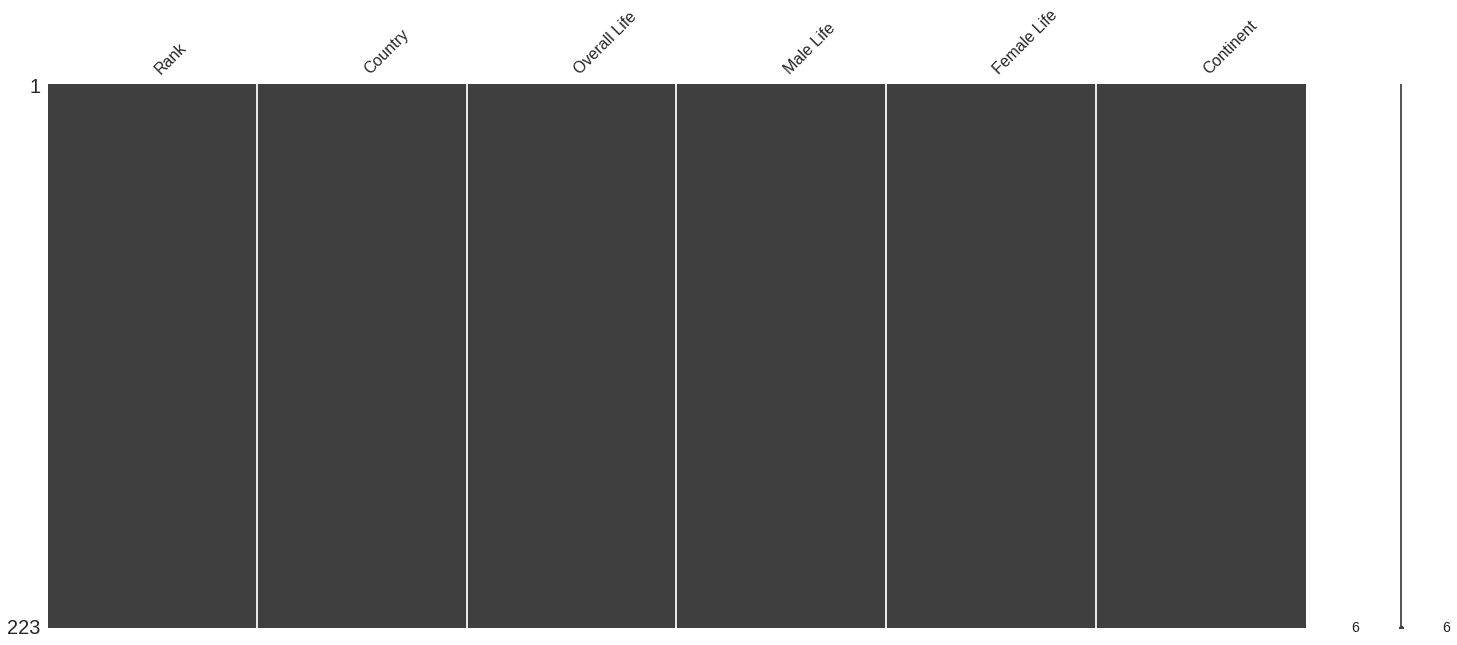

In [5]:
import missingno as msno

msno.matrix(df)  # just to visualize. no missing value.

Terlihat bahwa dataset yang dimiliki bersih dari missing value

###4.1 DROP KOLOM YANG TIDAK PENTING

In [6]:
df['Rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Saya memutuskan untuk drop fitur Rank karena informasi yang dimuat tidak merepresentasikan suatu data yang bersifat penting, dan hanya berisi informasi mengenai pemeringkatan yang mana informasi tersebut tidak tepat dijadikan tolak ukur untuk kasus clustering ini.

In [7]:
df.drop(columns=["Rank"],axis=1,inplace=True)

In [8]:
df.shape

(223, 5)

###4.2 RENAMED KOLOM

In [9]:
df = df.rename(
    columns = {'Overall Life' : 'Overall_Life'}
)

In [10]:
df = df.rename(
    columns = {'Male Life' : 'Male_Life'}
)

In [11]:
df = df.rename(
    columns = {'Female Life' : 'Female_Life'}
)

In [12]:
df.head(1)

,Country,Overall_Life,Male_Life,Female_Life,Continent
0,Monaco,89.5,85.6,93.5,Europe


#5. EDA

In [13]:
df.describe()

,Overall_Life,Male_Life,Female_Life
count,223.000000,223.000000,223.000000
mean,72.487892,70.041704,75.019283
std,8.459335,8.074942,8.986633
min,50.200000,48.600000,51.000000
25%,67.450000,64.500000,69.750000
50%,74.900000,72.200000,77.900000
75%,78.600000,75.850000,81.600000
max,89.500000,85.600000,93.500000


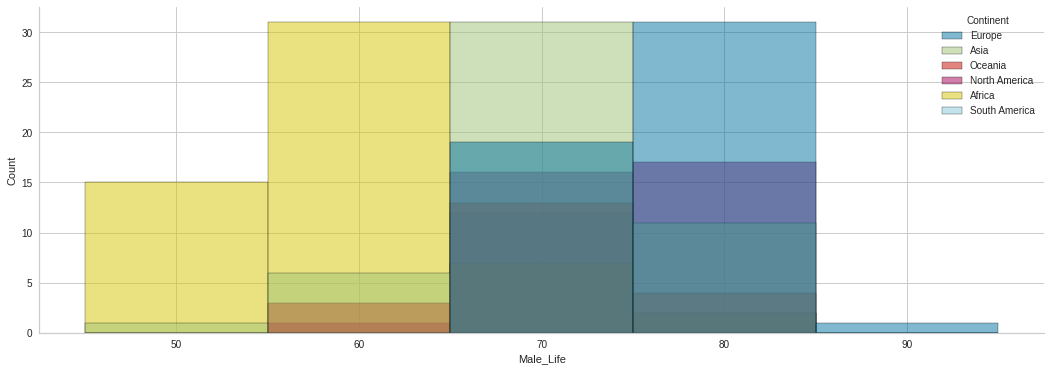

In [20]:
bins = [45, 55, 65, 75, 85, 95]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="Male_Life", bins=bins, hue="Continent");
sns.despine(top=True, right=True)

*   Low males expectancy life banyak terdapat pada Africa
*   High males expectancy life banyak terdapat pada Europe


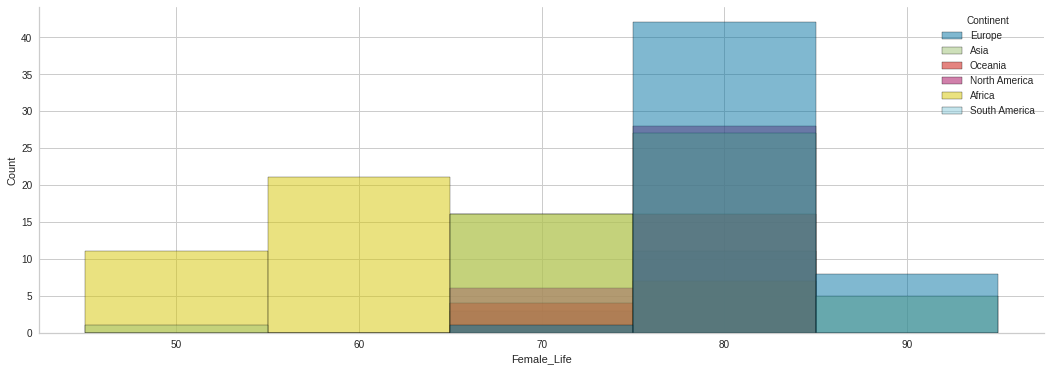

In [21]:
bins = [45, 55, 65, 75, 85, 95]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="Female_Life", bins=bins, hue="Continent");
sns.despine(top=True, right=True)

*   Low females expectancy life banyak terdapat pada Africa
*   High females expectancy life banyak terdapat pada Europe

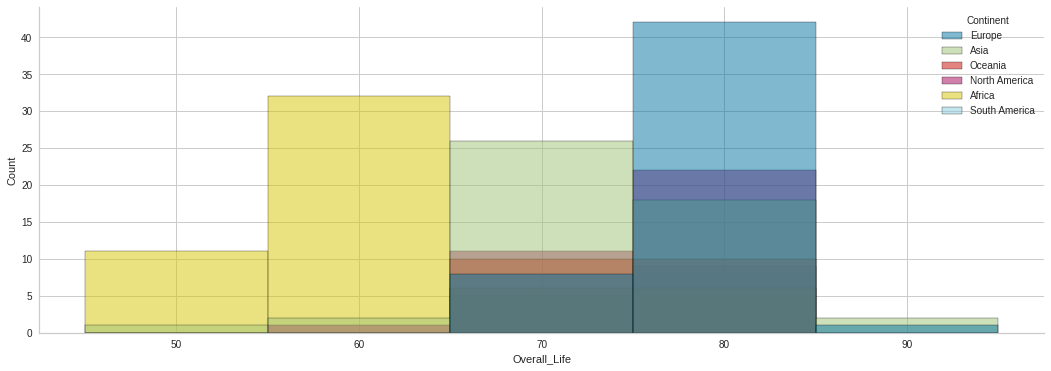

In [22]:
bins = [45, 55, 65, 75, 85, 95]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="Overall_Life", bins=bins, hue="Continent");
sns.despine(top=True, right=True)

*   Low overall expectancy life banyak terdapat pada Africa
*   High overall expectancy life banyak terdapat pada Asia & Europe

#6. PREPROCESSING DATA

###6.1 ENCODE FITUR NON NUMERIK

In [15]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,Country,Overall_Life,Male_Life,Female_Life,Continent
0,127,149,152,150,2
1,98,148,150,149,1
2,174,148,151,148,1
3,115,147,149,147,1
4,168,146,147,146,2


###6.2 HANDLING OUTLIER

In [16]:
for i in df.select_dtypes(include=['float64','int64']).columns:
  max_thresold=df[i].quantile(0.95)
  min_thresold=df[i].quantile(0.05)
  df_no_outlier=df[(df[i] < max_thresold) & (df[i] > min_thresold)].shape
  print(" outlier in ",i,"outliers" ,int(((df.shape[0]-df_no_outlier[0])/df.shape[0])*100),"%")

 outlier in  Country outliers 10 %
 outlier in  Overall_Life outliers 10 %
 outlier in  Male_Life outliers 10 %
 outlier in  Female_Life outliers 11 %
 outlier in  Continent outliers 30 %


Saya memutuskan untuk melakukan capping pada fitur dengan presentase outlier <= 15%. Saya memutuskan untuk tidak melakukan treatment apapun terhadap fitur dengan presentase outlier di atas 15%, dengan alasan karena datanya memang seperti itu.

Terdapat beberapa fitur yang akan dihandling outliernya, yaitu:

*   Country outliers 10 %
*   Overall Life outliers 10 %
*   Male outliers 10 %
*   Female outliers 11 %

In [17]:
# remove outliers from columns having nearly 15% outlier
max_thresold_Country = df["Country"].quantile(0.95)
min_thresold_Country = df["Country"].quantile(0.05)
max_thresold_Overall_Life = df["Overall_Life"].quantile(0.95)
min_thresold_Overall_Life = df["Overall_Life"].quantile(0.05)
max_thresold_Male_Life = df["Male_Life"].quantile(0.95)
min_thresold_Male_Life = df["Male_Life"].quantile(0.05)
max_thresold_Female_Life = df["Female_Life"].quantile(0.95)
min_thresold_Female_Life = df["Female_Life"].quantile(0.05)
df = df[(df["Country"] < max_thresold_Country) & (df["Country"] > min_thresold_Country) &  (df["Overall_Life"] < max_thresold_Overall_Life) & (df["Overall_Life"] > min_thresold_Overall_Life) & (df["Male_Life"] < max_thresold_Male_Life) & (df["Male_Life"] > min_thresold_Male_Life) & (df["Female_Life"] < max_thresold_Female_Life) & (df["Female_Life"] > min_thresold_Female_Life)]

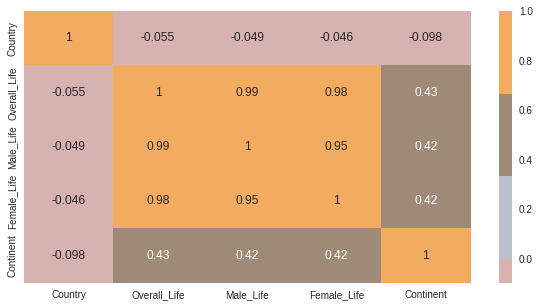

In [18]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(10,5))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Outlier pada datase sudah di handling

###6.2 SCALING

In [19]:
#Creating a copy of data
ds = df.copy()
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [20]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Country,Overall_Life,Male_Life,Female_Life,Continent
0,0.052035,1.756689,1.761555,1.669727,0.089925
1,-1.288029,1.668526,1.588906,1.614603,0.770231
2,-0.205670,1.668526,1.646456,1.587041,0.089925
3,0.017674,1.668526,1.732780,1.614603,0.089925
4,0.550264,1.639138,1.761555,1.449230,0.089925


###6.3 DIMENSIONALLY REDUCTION

In [21]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,174.0,1.914178e-16,1.793733,-2.974379,-1.581173,-0.158226,1.214873,3.680722
col2,174.0,-1.020895e-17,1.008345,-1.922795,-0.837715,-0.075302,0.873224,2.085310


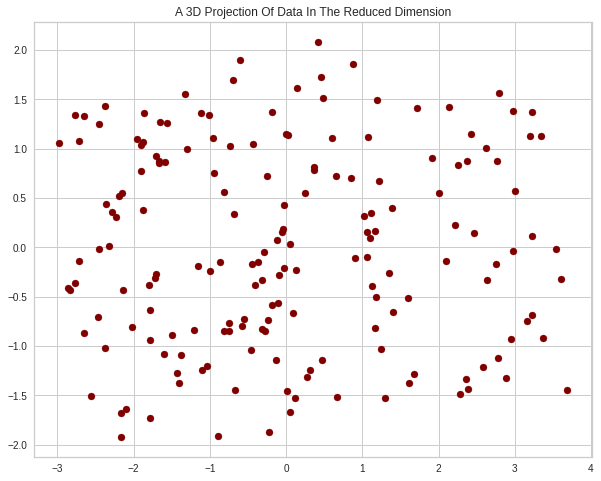

In [22]:
#A 2D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

#7. MODELING

###7.1 HYPERPARAMETER TUNNING

In [23]:
def train_kmeans(k,PCA_ds):
  kmeans_model = KMeans(n_clusters=k)
  y_pred = kmeans_model.fit_predict(PCA_ds)
  print("K-Means Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(PCA_ds,y_pred))

In [24]:
clusters=[2,3,4,5,6]
for i in clusters:
  train_kmeans(i,PCA_ds)

K-Means Clustering : clusters :  2  silhouette_score :  0.45570350527983566
K-Means Clustering : clusters :  3  silhouette_score :  0.39514527742207006
K-Means Clustering : clusters :  4  silhouette_score :  0.38114326011545335
K-Means Clustering : clusters :  5  silhouette_score :  0.3872206458764755
K-Means Clustering : clusters :  6  silhouette_score :  0.4064129962277502


###7.2 TRAIN K-MEANS CLUSTERING

Based on silhouette score, jumlah cluster terbaik untuk kasus ini adalah sebanyak 2 cluster

In [25]:
#Initiating the Agglomerative Clustering model 
kmeans_model = KMeans(2)
# fit model and predict clusters
yhat_K2= kmeans_model.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_K2
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_K2

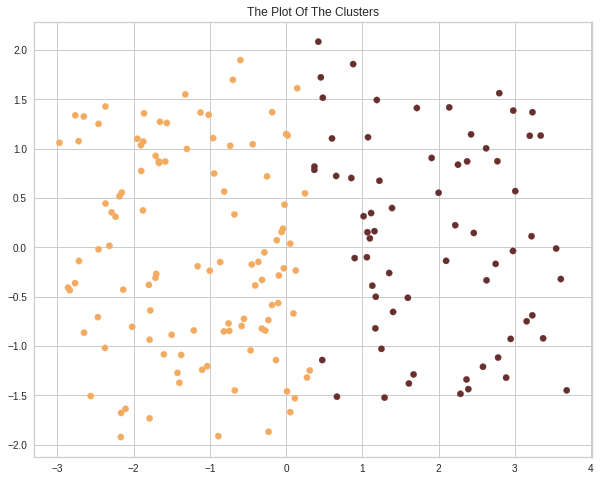

In [26]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

#8. EVALUASI MODEL

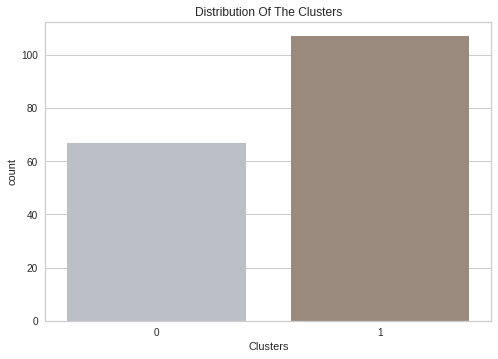

In [27]:
#Plotting countplot of clusters
pal = ["#B9C0C9", "#9F8A78"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

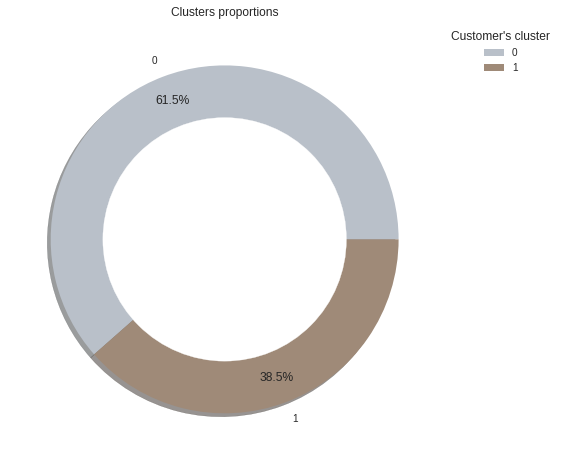

In [28]:
sizes = dict(df['Clusters'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors = pal)
plt.legend(title="Customer's cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Terlihat bahwa cluster 0 mendominasi dengan presentase sebesar 61.5% kemudian diikuti oleh cluster 1 dengan presentase 38.5%

In [29]:
df.head(1)

,Country,Overall_Life,Male_Life,Female_Life,Continent,Clusters
12,114,139,142,140,2,1


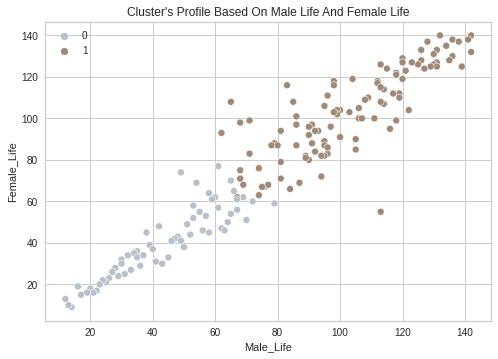

In [30]:
pl = sns.scatterplot(data = df,x=df["Male_Life"], y=df["Female_Life"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Male Life And Female Life")
plt.legend()
plt.show()

*   Cluster 0: high life expectancy of males & high life expectancy of males
*   Cluster 1: low life expectancy of males & low life expectancy of males


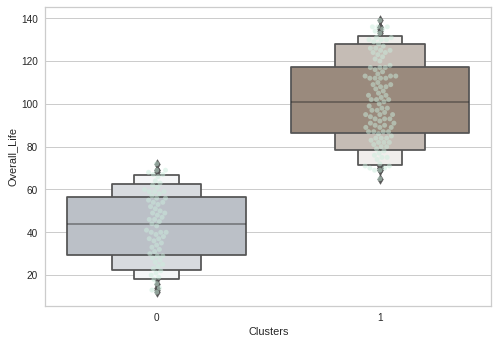

In [31]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Overall_Life"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Overall_Life"], palette=pal)
plt.show()

Terlihat bahwa cluster 0 memiliki overall life expectancy yang tinggi dibandingkan dengan cluster 1

In [32]:
ori_df['Continent'].unique()

array(['Europe', 'Asia', 'Oceania', 'North America', 'Africa',
       'South America'], dtype=object)

In [33]:
df['Continent'].unique()

array([2, 3, 4, 1, 0, 5])

*   0: Africa
*   1: North America
*   2: Europe
*   3: Asia
*   4: Ocenia
*   5: South America

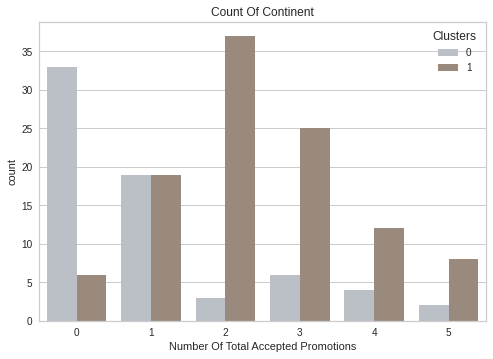

In [34]:
plt.figure()
pl = sns.countplot(x=df["Continent"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Continent")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

*   Cluster 0: Banyak tersebar di Continent Europe & Asia
*   Cluster 1: Banyak tersebar di Continent Africa & North America

#9. PROFILING

**CLUSTER 0: High Life Expectancy**

---
*   Banyak tersebar di Europe dan Asia
*   memiliki males life expectancy yang tinggi
*   memiliki females life expectancy yang tinggi
*   memiliki overall life expectancy yang tinggi dibandingkan dengan cluster 1


**CLUSTER 1: Low Life Expectancy**

---
*   Banyak tersebar di Africa & North America
*   memiliki males life expectancy yang lebih rendah
*   memiliki females life expectancy yang lebih rendah
*   memiliki overall life expectancy yang lebih rendah dibandingkan dengan cluster 1


#10. MODEL INFERENCE

In [35]:
from sklearn.utils import shuffle

In [36]:
df_inf = shuffle(ori_df)
df_inf

,Rank,Country,Overall Life,Male Life,Female Life,Continent
204,205,Zimbabwe,58.0,57.3,58.7,Africa
70,71,Brunei,77.2,74.8,79.6,Asia
210,211,Uganda,55.4,54.0,56.9,Africa
197,198,Burundi,60.5,58.8,62.3,Africa
113,114,Turkey,74.8,72.5,77.3,Asia
...,...,...,...,...,...,...
46,47,Gibraltar,79.4,76.6,82.5,Europe
196,197,Guinea,60.6,59.0,62.2,Africa
114,115,El Salvador,74.7,71.4,78.1,North America
81,82,Sri Lanka,76.8,73.3,80.4,Asia


In [37]:
df_inf.drop(columns=["Rank"],axis=1,inplace=True)

In [38]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_inf = df_inf.apply(le.fit_transform)
df_inf.head()

,Country,Overall Life,Male Life,Female Life,Continent
204,222,17,20,14,0
70,28,102,106,100,1
210,207,12,13,10,0
197,32,24,24,22,0
113,202,83,89,81,1


In [39]:
pred_data_scaled = pd.DataFrame(scaler.transform(df_inf),columns= df_inf.columns )
print("All features are now scaled")

All features are now scaled


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Female Life
- Male Life
- Overall Life
Feature names seen at fit time, yet now missing:
- Female_Life
- Male_Life
- Overall_Life

  warnings.warn(message, FutureWarning)


In [40]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2)
pca.fit_transform(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(pred_data_scaled), columns=(["col1","col2"]))
PCA_ds.describe().T

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Female Life
- Male Life
- Overall Life
Feature names seen at fit time, yet now missing:
- Female_Life
- Male_Life
- Overall_Life

  warnings.warn(message, FutureWarning)


,count,mean,std,min,25%,50%,75%,max
col1,223.0,-0.013501,2.078570,-3.354179,-1.748393,-0.233614,1.395819,4.051898
col2,223.0,-0.013046,1.110823,-1.942723,-0.924831,-0.108823,1.001237,2.196374


In [42]:
predict = kmeans_model.predict(PCA_ds)
predict

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1], dtype=int32)

#11. KESIMPULAN

**Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan?**

---

Continent dengan low life expectancy terdapat pada Africa dan continent dengan high life expectancy terdapat pada Asia & Europe.

**Berapa cluster yang berhasil kamu peroleh dari dataset tersebut? apakah sudah optimal? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.**

---

Based on silhouette score, jumlah cluster terbaik untuk kasus ini adalah sebanyak 2 cluster

**Bagaimana karakteristik dari masing-masing cluster? Bisakah kamu visualisasikan dan ceritakan?**

---

CLUSTER 0: High Life Expectancy

---
*   Banyak tersebar di Europe dan Asia
*   memiliki males life expectancy yang tinggi
*   memiliki females life expectancy yang tinggi
*   memiliki overall life expectancy yang tinggi dibandingkan dengan cluster 1


---


CLUSTER 1: Low Life Expectancy

---
*   Banyak tersebar di Africa & North America
*   memiliki males life expectancy yang lebih rendah
*   memiliki females life expectancy yang lebih rendah
*   memiliki overall life expectancy yang lebih rendah dibandingkan dengan cluster 1


**Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh? coba ceritakan analisamu**

---
Terdapat kesamaan bahwa continent dengan low life expectancy terdapat pada Africa dan continent dengan high life expectancy terdapat pada Asia & Europe.

Dimana lebih diperjelas lagi member yang menempati kedua status wilayah tersebut dengan clustering.

Cluster 0 dengan low life expectancy banyak terdapat di Africa dan cluster 1 dengan high life expectancy banyak terdapat di Asia dan Europe
